In [1]:
import numpy as np

num_points = 11
degree = 10
x = np.linspace(0, 10, num_points)
y = x + np.random.random(size=11) - 0.5

import matplotlib.pyplot as plt
p = np.polyfit(x, y, degree)

xx = np.linspace(0, 10, 101)
def fit(xx, degree):
    yy = np.zeros(len(xx))
    for i in range(len(p)):
        yy += xx ** (degree - i) * p[i]
    return yy
yy = fit(xx, degree)

poly_str = ''     
for i in range(degree):
    poly_str += str(p[i]) + 'x^' + str(degree - i) + ' + '
poly_str += str(p[degree])

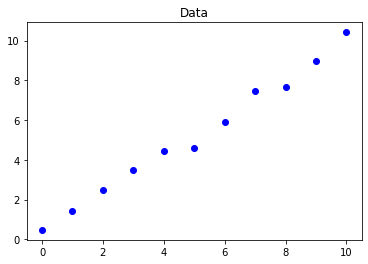

In [2]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'bo')
plt.title('Data')
plt.show()

Here is some data

In [3]:
print('y = x + u, u ~ U(-0.5, 0.5)')

y = x + u, u ~ U(-0.5, 0.5)


Which model do you prefer?

Which model do you prefer?

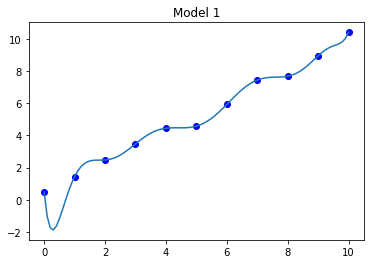

In [4]:
plt.plot(x, y, 'bo')
plt.plot(xx, yy)
plt.title('Model 1')
plt.show()

Model 1

In [5]:
print(poly_str)

2.1531832401930588e-05x^10 + -0.001128483488179379x^9 + 0.025280653012903036x^8 + -0.3159164181383804x^7 + 2.410386125064206x^6 + -11.551307379389943x^5 + 34.444845226282304x^4 + -60.95698781613111x^3 + 57.3122758993355x^2 + -20.409888433069373x^1 + 0.4791438738111367


The mathematical form of model 1. A tenth order polynomial.

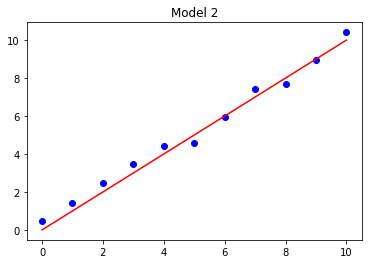

In [6]:
plt.plot(x, y, 'bo')
plt.plot(x, x, 'r')
plt.title('Model 2')
plt.show()

Model 2.

In [7]:
print('y = x')

y = x


The mathematical form of model 2.

Prefer a *simple* model (Occam's razor)

I expect you prefer model 2. We prefer simple models - that's Occam's razor. The tenth order polynomial fits our data perfectly, but the fit is too good. Model 1 won't generalise because the shape of the fit is too specific.

A simple network has low capacity (small number of units) and small weight and bias values

In analogy with polynomial fits of points, 'simple', means low capacity. 

Parameters are **regular** if they occupy a small interval close to zero

- large weight parameters will amplify input noise

- the network will attempt to fit to the noise

- a model with smaller weights is more robust

Parameters are 'regular' if they occupy a small interval close to zero. Large weight parameters will amplify input noise. The network will attempt to fit to the noise. A model with smaller weights is therfore more robust.

**Weight regularisation**

- L1: A cost proportional to the absolute value of the weight parameters is added to the loss function

- L2 (aka weight decay): As above, but the cost is the square of the weight parameters

Weight regularisation is the attempt to prevent weights getting too big and dominant. In L1 regularisation, a cost proportional to the absolute value of the weight parameters is added to the loss function and in L2 regularisation (aka weight decay) the additional cost is the square of the weight parameters.

TensorFlow Keras weight parameter regularisation is achieved by adding a weight regularizer instance to the `add` argument list

```
model.add(layers.Dense(16, 
                       kernel_regularizer = regularizers.l2(0.001),
                       activation='relu', 
                       input_shape=(10000,)))
```                         

TensorFlow Keras weight parameter regularisation is achieved by adding a weight regularizer instance to the `add` argument list.

`l2(0.001)` means $0.001 \times w^T \cdot w$ is added to the loss function

`l2(0.001)` means $0.001 \times w^T \cdot w$ is added to the loss function.

`regularizers.l1(0.001)` for L1 regularisation

`regularizers.l1(0.001) + regularizers.l2(0.001)` for combined L1 and L2 regularisation

L1 regularisation and combine L1 and L2 regularisation. 

In [8]:
from tensorflow.keras.datasets import imdb

((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words = 10000)

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Let us compare L2 regularisation to the unregularised IMDB network. 

Download and vectorise data.

In [9]:
from tensorflow.keras import models, layers, regularizers

def build_model(layer_1_units, layer_2_units, layer_3_units, reg):
    model = models.Sequential()
    
    if (reg):
        model.add(layers.Dense(layer_1_units, kernel_regularizer = regularizers.l2(0.001), 
                               activation='relu', input_shape=(10000,)))
        model.add(layers.Dense(layer_2_units, kernel_regularizer=regularizers.l2(0.001), 
                               activation='relu'))
    else:
        model.add(layers.Dense(layer_1_units, activation='relu', input_shape=(10000,)))
        model.add(layers.Dense(layer_2_units, activation='relu'))
    

    model.add(layers.Dense(layer_3_units, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])
    return model

A model building function with optional regularisation.

In [10]:
model = build_model(16, 16, 1, reg=False)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5480 - acc: 0.7622 - val_loss: 0.4131 - val_acc: 0.8705
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3331 - acc: 0.8966 - val_loss: 0.3238 - val_acc: 0.8840
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2426 - acc: 0.9231 - val_loss: 0.2838 - val_acc: 0.8919
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1905 - acc: 0.9390 - val_loss: 0.2734 - val_acc: 0.8938
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1543 - acc: 0.9512 - val_loss: 0.2748 - val_acc: 0.8924
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1268 - acc: 0.9623 - val_loss: 0.2829 - val_acc: 0.8890
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1063 - acc: 0.9684 - val_loss: 0.3015 - val_acc: 0.8860
Epoch 8/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0875 - a

Training the unregularised original IMDB network

In [11]:
l2_model = build_model(16, 16, 1, reg=True)
l2_history = l2_model.fit(partial_x_train,
                          partial_y_train,
                          epochs=20,
                          batch_size=512,
                          validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6014 - acc: 0.7837 - val_loss: 0.4949 - val_acc: 0.8534
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4189 - acc: 0.8890 - val_loss: 0.4187 - val_acc: 0.8492
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3348 - acc: 0.9078 - val_loss: 0.3743 - val_acc: 0.8717
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2893 - acc: 0.9207 - val_loss: 0.3796 - val_acc: 0.8643
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2627 - acc: 0.9293 - val_loss: 0.3376 - val_acc: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2442 - acc: 0.9373 - val_loss: 0.3349 - val_acc: 0.8871
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2287 - acc: 0.9440 - val_loss: 0.3524 - val_acc: 0.8806
Epoch 8/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2178 - a

Training the regularised model.

In [12]:
import matplotlib.pyplot as plt
    
def plot_loss_comparison(loss_a, label_a, loss_b, label_b, y_label):

    epochs = range(1, len(loss_a) + 1)

    plt.plot(epochs, loss_a, 'b+', label = label_a)
    plt.plot(epochs, loss_b, 'bo', label = label_b)
    plt.xlabel('Epochs')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

Plot comparison function.

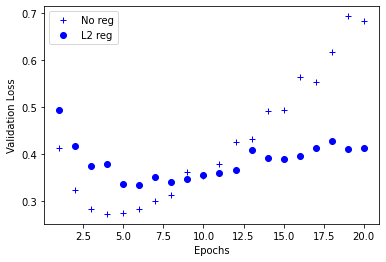

In [13]:
plot_loss_comparison(history.history['val_loss'], 'No reg', 
                     l2_history.history['val_loss'], 'L2 reg', 'Validation Loss')

The L2 regularised model resists overfitting even though both networks have the same capacity (160305 tuneable parameters)